# Metrics for model evaluation (Classification example)



The purpose of this LAB is to identify the machine learning algorithm that is best-suited for the classification problem and compute its perfomance using metrics.

### Data

The "fruits" dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. Then the professors at University of Michigan formatted the fruits data slightly and it can be downloaded from https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt.

Let’s have a look the first a few rows of the data.

In [16]:
#Activate read data from google colab
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [18]:
#fruits = pd.read_table('fruit_data_with_colors.txt')
fruits = pd.read_table('/content/gdrive/My Drive/UAB/ML4PM/Notebooks/Dataset/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Each row of the dataset represents one piece of the fruit as represented by several features that are in the table’s columns.

We have 59 pieces of fruits and 7 features in the dataset:

In [19]:
print(fruits.shape) #dataframe dimension

(59, 7)


We have four types of fruits in the dataset:

In [20]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


Now we will see how many observations we have by type of fruit.

In [21]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


<ipython-input-22-d82dd35a4eb1>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fruits['fruit_name'].unique()) #We could change manually x category labels


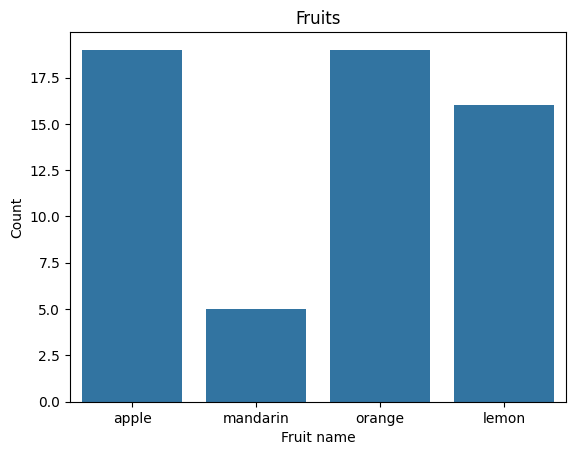

In [22]:
#classes bar plot (Balanced number of classes)
ax= sns.countplot(x=fruits['fruit_name'])
ax.set_xlabel("Fruit name")
ax.set_ylabel("Count")
ax.set_xticklabels(fruits['fruit_name'].unique()) #We could change manually x category labels
ax.set_title("Fruits")
plt.show()

We can see that the data is pretty balanced except mandarin. We will just have to go with it.

How can we consider this situation: balanced or unbalanced?

### Visualization

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

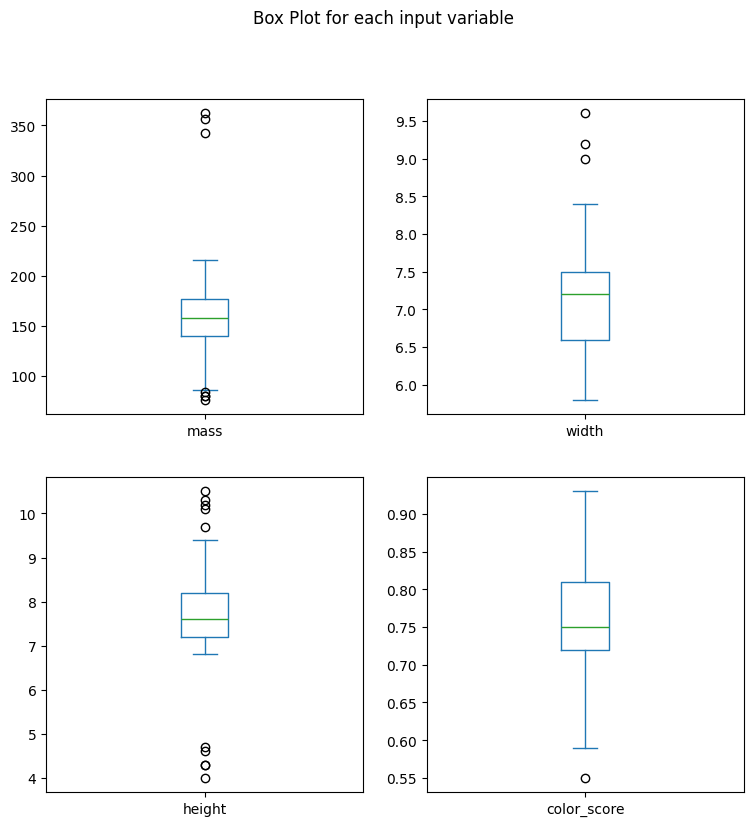

In [23]:
#variable boxplot: see in https://www.simplypsychology.org/boxplots.html
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9),
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

It looks like perhaps color score has a near Gaussian distribution.

Now we can see the distribution with a histogram for each input variable

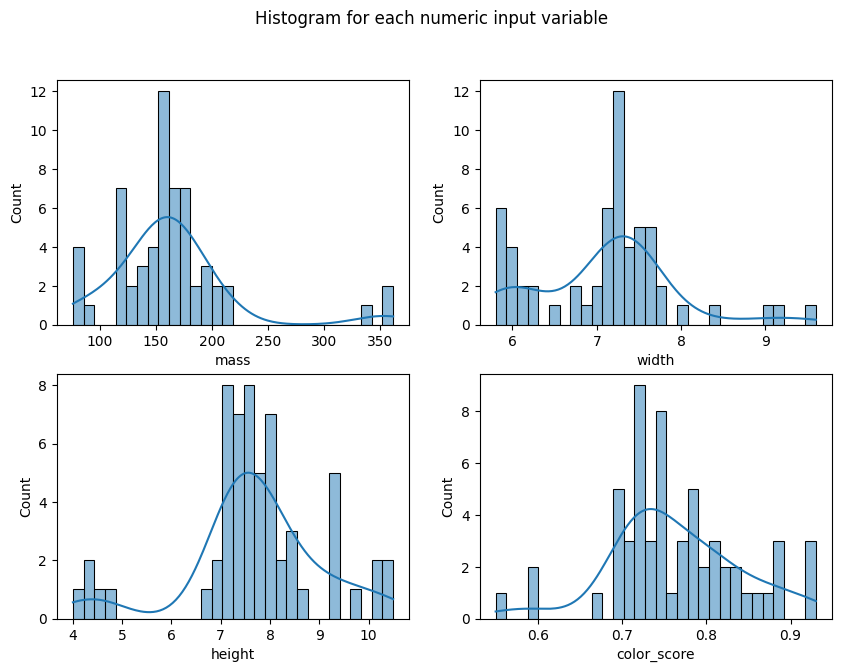

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.ravel()
for i, var in enumerate(['mass', 'width', 'height', 'color_score']):
    sns.histplot(data=fruits, x=var, ax=axs[i], kde=True,bins=30)


plt.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')


Now we can look at the correlation between the variables, for this purpose, we can make a scatter matrix.

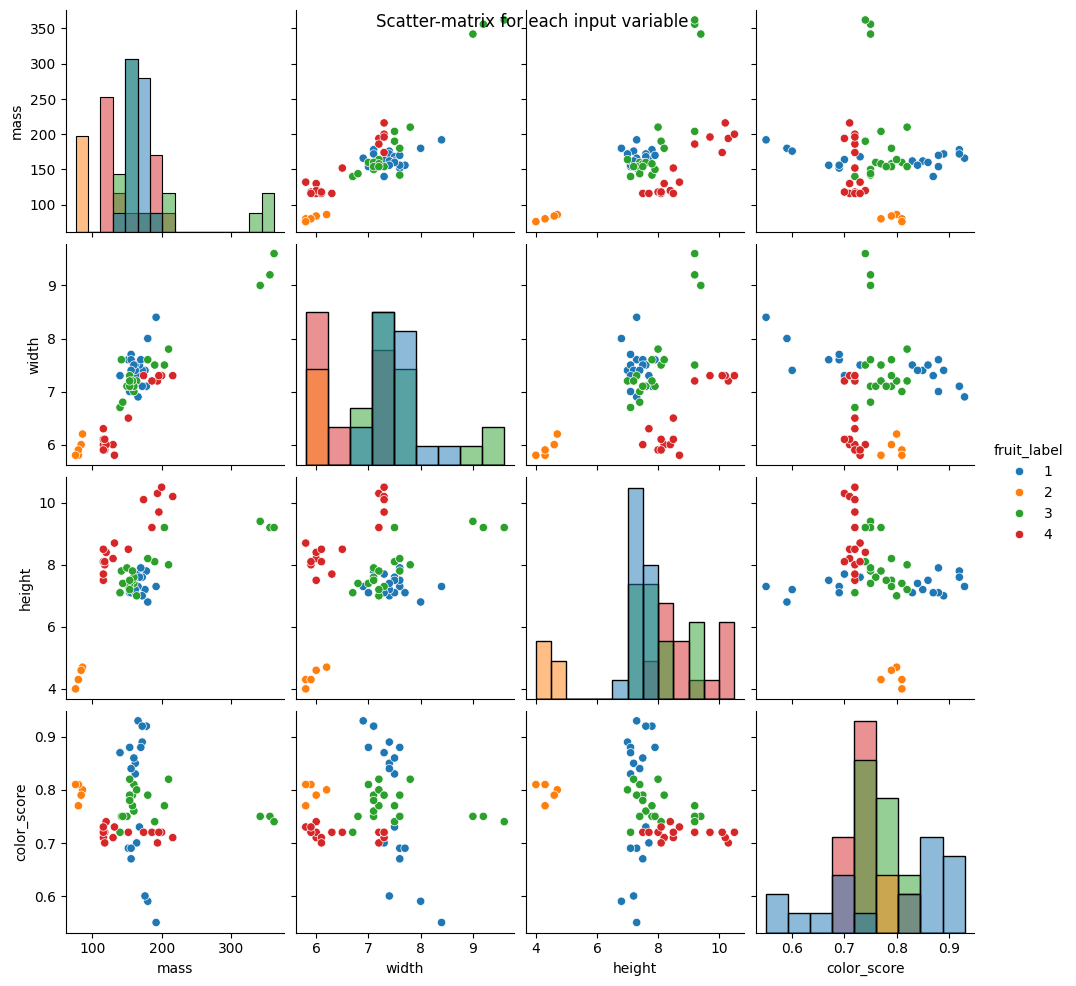

In [25]:
sns.pairplot(fruits, hue='fruit_label',diag_kind="hist",palette="tab10")
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

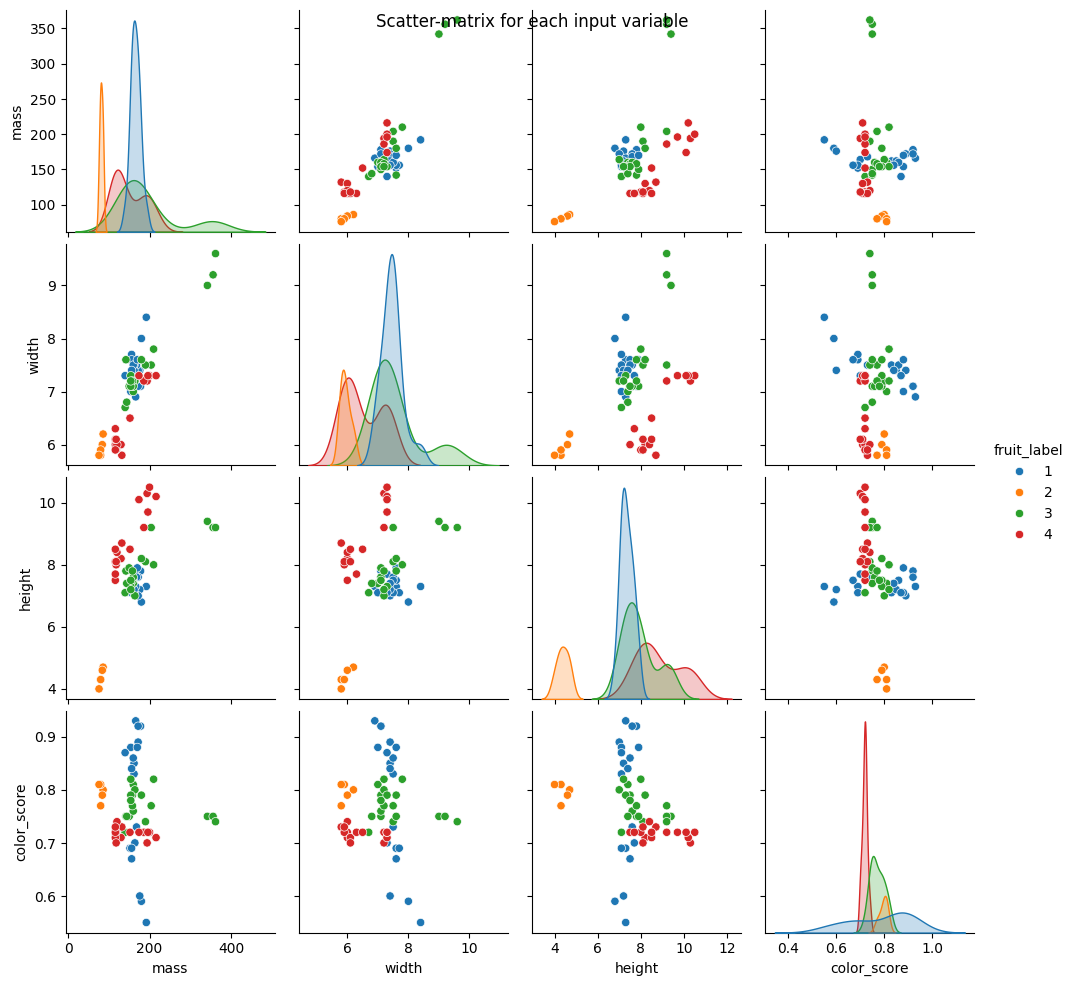

In [26]:
sns.pairplot(fruits, hue='fruit_label',palette='tab10')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix2')

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

### Create Training and Test Sets and Apply Scaling

Splitting data into training and test sets is a common practice in machine learning and data analysis.

By splitting the data into a training set and a test set, we can train the model on the training set and evaluate its performance on the test set. This allows us to estimate how well the model will perform on new, unseen data, and to make adjustments to the model or the training process as necessary.

A common practice is to use 80% of the data for training and 20% for testing, but this ratio can vary depending on various factors as the size of the dataset, the nature of the problem, and the desired level of accuracy.

On the other hand, **scaling data** is a common preprocessing step that ensures that all features are on a similar scale, which can help to improve the performance of some machine learning algorithms. There are different methods to scale data as the one we are using, min max scaling.

MinMaxScaler transform features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [27]:
#import functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#select feature names (variables)
feature_names = ['mass', 'width', 'height', 'color_score']

#data X Y
X = fruits[feature_names]
y = fruits['fruit_label']

#SPLIT DATA: TRAINING AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#MinMaxScaler transform
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
print(X_train, X_test) #transformed with MinMaxScaler
print(X_train.shape) #train
print(X_test.shape)

[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]
 [0.27142857 0.52941176 0.50769231 0.37837838]
 [0.31428571 0.41176471 0.46153846 0.67567568]
 [0.2        0.         0.72307692 0.48648649]
 [0.3        0.35294118 0.52307692 0.7027027 ]
 [0.27857143 0.44117647 0.50769231 0.64864865]
 [0.14285714 0.02941176 0.63076923 0.48648649]
 [0.30714286 0.5        0.47692308 0.75675676]
 [0.14285714 0.14705882 0.56923077 0.45945946]
 [0.45714286 0.5        0.8        0.59459459]
 [0.28571429 0.55882353 0.47692308 0.37837838]
 [0.01428571 0.         0.04615385 0.59459459]
 [0.47857143 0.58823529 0.61538462 0.72972973]
 [0.28571429 0.52941176 0.53846154 0.32432432]
 [0.19285714 0.05882353 0.64615385 0.43243243]
 [0.3        0.5        0.53846154 0.83783784]
 [0.14285714 0.05882353 0.53846154 0.45945946]
 [0.36428571 0.38235294 0.58461538 1.        ]
 [0.31428571 0.44117647 0.56923077 0.40540541]
 [1.         

### Build Models

Now we are gonna build some differents models and see which one is the best for our case based on different metrics. We will see 4 metrics (precision, recall, f1-score and accuracy)


*   **Accuracy:** the proportion of correctly classified instances out of the total number of instances.
*   **Precision:** the proportion of true positive instances out of all positive predictions.
*   **Recall:** the proportion of true positive instances out of all actual positive instances.
*   **F1-score:** the harmonic mean of precision and recall, which balances both metrics.











Also, we will see see the confusion matrix, which is used to describe the performance of a classification model on a set of test data.

In [29]:
# Function to plot confusion matrix:
def CM(ytrue, ypred, clases=None, normalize = False):
  conf_matrix=confusion_matrix(ytrue, ypred)
  fig, ax = plt.subplots(figsize=(8, 8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                  xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  ax.set_title("Confusion Matrix")
  ax.set_xlabel("Predicted Label")
  ax.set_ylabel("True Label")
  plt.show()


*   **Logistic Regression**

A llitle of theory in: https://www.geeksforgeeks.org/understanding-logistic-regression/



1.   Logistic regression is a powerful statistical technique used for classification problems, where you want to predict the probability of an event occurring based on one or more independent variables. Think of it like a yes/no or true/false prediction, but with a confidence score attached.
2.   Modeling: Logistic regression builds a mathematical model that relates the features (independent variables) to the probability of the target event (dependent variable). It uses a sigmoid function, which squeezes the predicted probabilities between 0 and 1.






In [30]:
#We are going to adjust a classification model, the logistic regression model, to predict the classes of fruits
logreg = LogisticRegression()
logreg.fit(X_train, y_train) #training set

pred = logreg.predict(X_test) #We are going to adjust a classification model, the logistic regression model, to predict the classes of fruits.
accuracy= accuracy_score(y_test, pred) #The classes are predicted with the test set and the metric is evaluated from this
print(classification_report(y_test, pred))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(accuracy))



              precision    recall  f1-score   support

           1       0.36      1.00      0.53         4
           2       0.00      0.00      0.00         1
           3       1.00      0.12      0.22         8
           4       0.67      1.00      0.80         2

    accuracy                           0.47        15
   macro avg       0.51      0.53      0.39        15
weighted avg       0.72      0.47      0.37        15

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


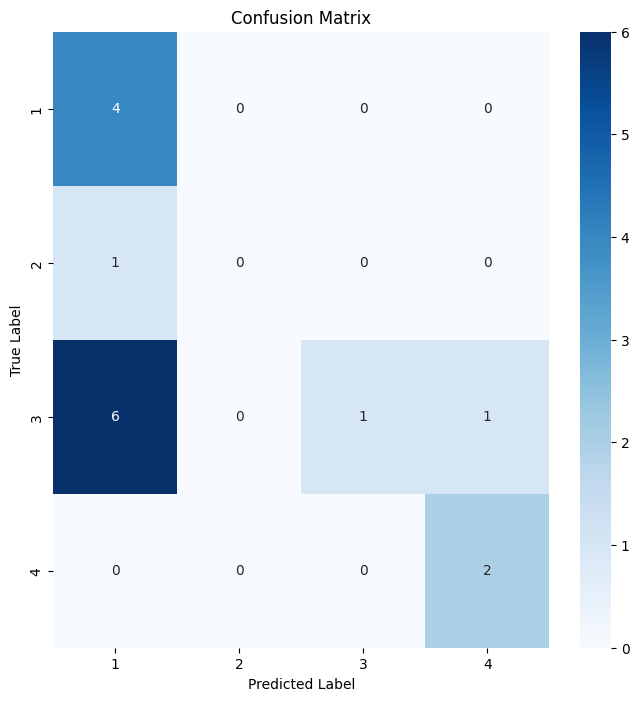

In [31]:
#Confusion matrix
CM(y_test,pred)

Now we are going to do the same with other very common methods in ML for classification, which will be explained in other lessons.

The metrics for each of these methods will be displayed.



*   **Decision Tree**

Theory and introduction in: https://www.geeksforgeeks.org/decision-tree/


*   A decision tree is a machine learning algorithm used for both classification and regression tasks. It works by building a tree-like structure where:
*   Internal nodes represent questions based on features (attributes) of the data. Branches represent the possible answers to those questions. Leaves represent the final predictions or classifications.

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
accuracy_clf= accuracy_score(y_test, pred_clf)
print(classification_report(y_test, pred_clf))

print('Accuracy of DecisionTree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(accuracy_clf))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         8
           4       1.00      1.00      1.00         2

    accuracy                           0.87        15
   macro avg       0.92      0.94      0.91        15
weighted avg       0.91      0.87      0.87        15

Accuracy of DecisionTree classifier on training set: 1.00
Accuracy of DecisionTree classifier on test set: 0.87


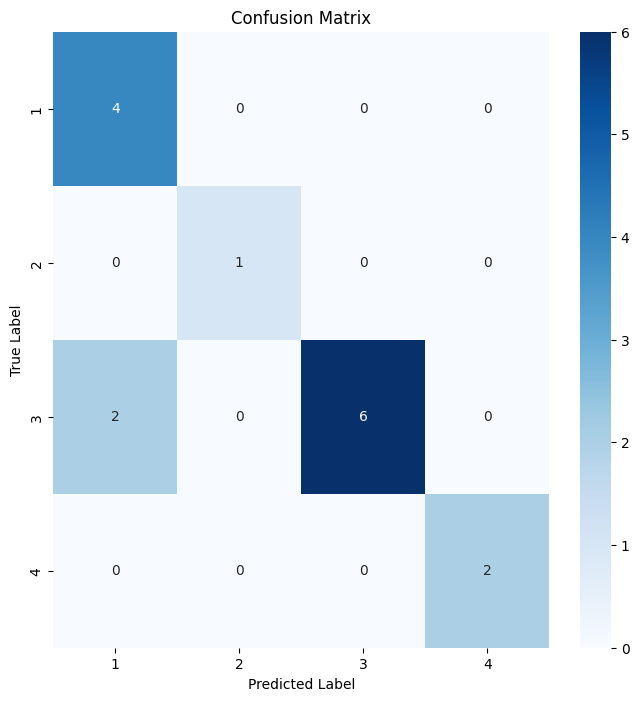

In [33]:
CM(y_test,pred_clf)

*   **Linear Discriminant Analysis (FDA)**

theory: https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/



*   Find a linear combination of features that maximizes the separation between different classes. Think of it as creating a dividing line or hyperplane that best separates the data points of different classes.




In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pred_lda = lda.predict(X_test)
accuracy_lda= accuracy_score(y_test, pred_lda)
print(classification_report(y_test, pred_lda))

print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(accuracy_lda))

              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       1.00      1.00      1.00         1
           3       0.67      0.75      0.71         8
           4       1.00      1.00      1.00         2

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.75        15
weighted avg       0.64      0.67      0.65        15

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


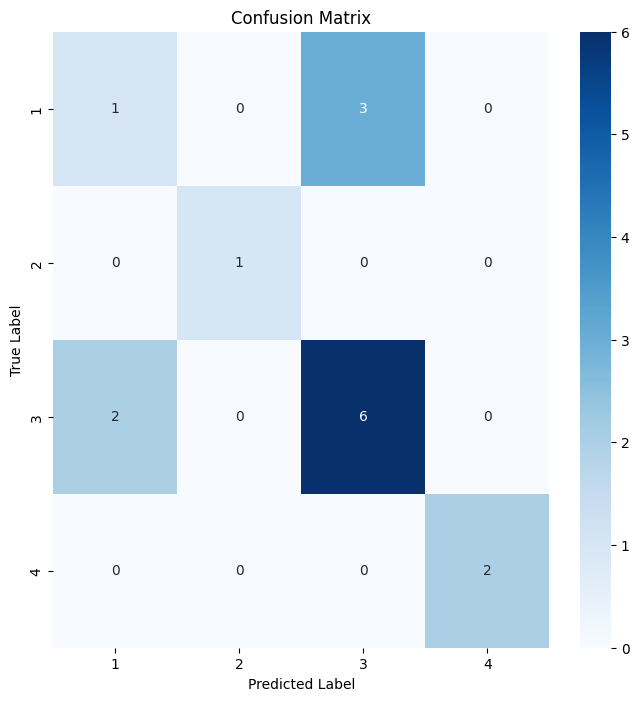

In [35]:
CM(y_test,pred_lda)

*   **K-Nearest Neighbors**

theory: https://www.geeksforgeeks.org/k-nearest-neighbours/

K-Nearest Neighbors (KNN) is a non-parametric, supervised machine learning algorithm used for both classification and regression tasks. It works by making predictions based on the similarity of a new data point to its k nearest neighbors in the training data.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
accuracy_knn= accuracy_score(y_test, pred_knn)
print(classification_report(y_test, pred_knn))

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(accuracy_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


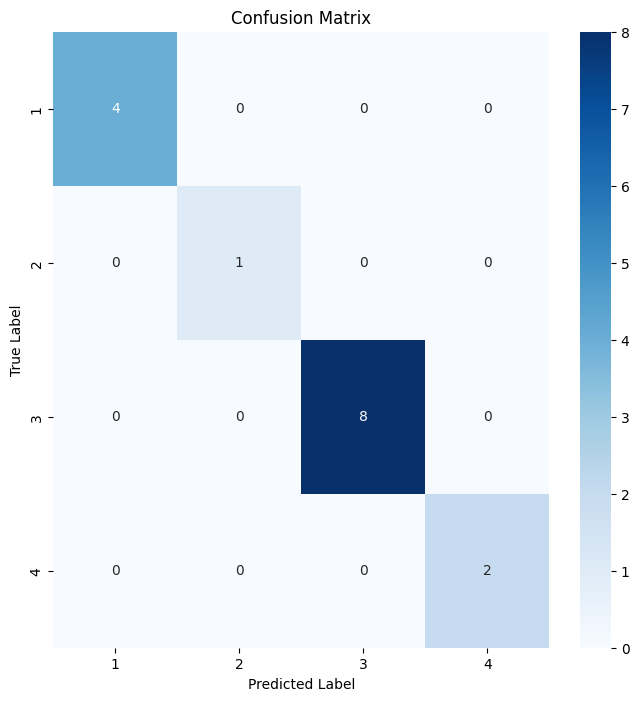

In [37]:
CM(y_test,pred_knn)

*   **Support Vector Machine**

theory: https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/



*   What it is: A powerful machine learning algorithm used for classification and regression, known for its ability to handle complex data and high dimensionality.

*   How it works: Imagine separating different data points (e.g., emails marked spam vs. not spam) by drawing a line (hyperplane) in a high-dimensional space. SVMs find the optimal hyperplane that maximizes the margin between the two categories,



In [38]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
accuracy_svm= accuracy_score(y_test, pred_svm)
print(classification_report(y_test, pred_svm))

print('Accuracy of SVC classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(accuracy_svm))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.67      1.00      0.80         2

    accuracy                           0.80        15
   macro avg       0.83      0.91      0.84        15
weighted avg       0.87      0.80      0.80        15

Accuracy of SVC classifier on training set: 0.95
Accuracy of SVC classifier on test set: 0.80


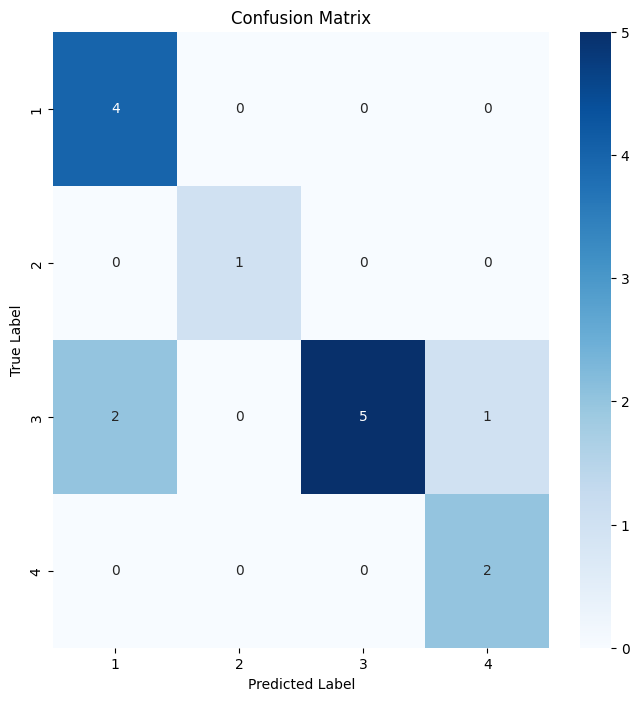

In [39]:
CM(y_test,pred_svm)

Parameter tuning and we must be critical of the decision made; it should be extrapolable and repeatable.

The KNN algorithm was the most accurate model that we tried. In this case, we see an indication of no error made on the test set. However, we have to keep in mind that the **test set is small**.

Plot the Decision Boundary of the k-NN Classifier

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


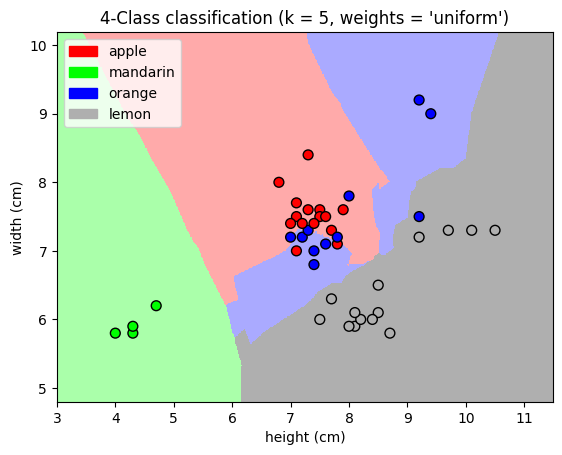

In [40]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

To find the best number of neighbors, we can do parameter tuning, which is to fit the model with different values and see which one obtains the best result.
For this particular dateset, we obtain the highest accuracy when k=5.

See more examples in: https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2



<!--NAVIGATION-->
Based partially in internet, only for teaching pourposes.

See in: https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2